In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5/
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16923, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 16923 (delta 57), reused 73 (delta 35), pack-reused 16805 (from 1)
Receiving objects: 100% (16923/16923), 15.70 MiB | 24.47 MiB/s, done.
Resolving deltas: 100% (11590/11590), done.
/kaggle/working/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 761.2 kB/s eta 0:00:000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 20.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.1/871.1 kB 48.2 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pointpats 2.5.0 requires shapely>=2, b

In [2]:
%pwd

'/kaggle/working/yolov5'

In [3]:
!pip install ultralytics

In [4]:
from ultralytics import YOLO
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image
import cv2
import yaml
import torch
from tensorflow.keras.applications.vgg16 import VGG16
os.path.isdir('/kaggle/input/dataset')

True

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
with open("/kaggle/input/dataset/data.yaml") as stream:
    print(yaml.safe_load(stream))

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 15, 'names': ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop'], 'roboflow': {'workspace': 'selfdriving-car-qtywx', 'project': 'self-driving-cars-lfjou', 'version': 6, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/selfdriving-car-qtywx/self-driving-cars-lfjou/dataset/6'}}


In [6]:
import shutil

source_dir = '/kaggle/input/dataset/'
destination_dir = '/kaggle/working/yolov5/'

shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)

'/kaggle/working/yolov5/'

In [7]:
!wandb disabled
!python train.py --img 415 --batch 16 --epochs 30 --data /kaggle/working/yolov5/data.yaml --weights yolov5s.pt --cache --workers 2

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


W&B disabled.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
train: weights=yolov5s.pt, cfg=, data=/kaggle/working/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-361-gc5ffbbf1 Python-3.10.14 torch-2.4.0 CUDA:0 (T

In [8]:
os.path.isfile('/kaggle/working/yolov5/valid/images/000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.jpg')

True

In [9]:
!python detect.py --source /kaggle/working/yolov5/valid/images/000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.jpg --weights /kaggle/working/yolov5/runs/train/exp/weights/best.pt

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


detect: weights=['/kaggle/working/yolov5/runs/train/exp/weights/best.pt'], source=/kaggle/working/yolov5/valid/images/000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-361-gc5ffbbf1 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7050580 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /kaggle/working/yolov5/valid/images/000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.jpg: 640x640 1 Speed Limit 30, 11.6ms
Speed: 0.6ms pre-process, 11.6ms inference, 156.2ms NMS per image at shape (1, 3, 640, 640)
Results

In [10]:
!ls runs/detect/exp

000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.jpg


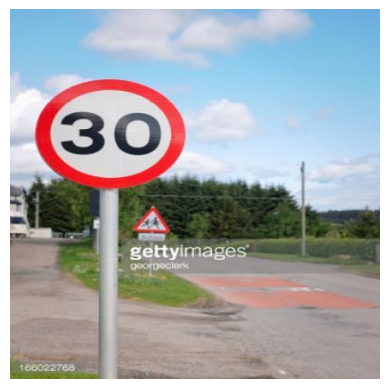

In [17]:
import matplotlib.pyplot as plt

image_path = '/kaggle/working/yolov5/valid/images/000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('off')
plt.show()

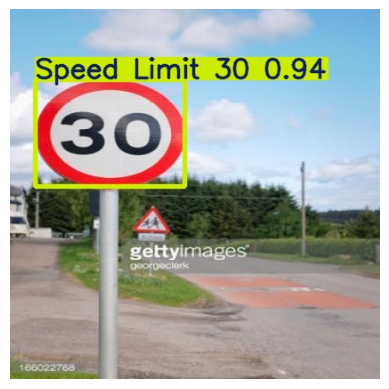

In [19]:
detect_path = '/kaggle/working/yolov5/runs/detect/exp/000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.jpg'
os.path.isfile(detect_path)
detect_image = cv2.imread(detect_path)
detect_image = cv2.cvtColor(detect_image, cv2.COLOR_BGR2RGB)

plt.imshow(detect_image)
plt.axis('off')
plt.show()